<a href="https://colab.research.google.com/github/Galera115/PDIH_UGR/blob/main/P5/Audio_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gTTS pydub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.wavfile import read, write
from scipy.signal import butter, lfilter, sosfilt, sosfreqz
from IPython.display import Audio

plt.style.use('seaborn-darkgrid')
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# https://gist.github.com/JonathanThorpe/9dab1729d19723ccd37730ffe477502a
import struct
import io

class WAVFile:

  def __init__(self, filename):
    self.filename = filename

  def read(self):
    with io.open(self.filename, 'rb') as fh:
      riff, size, fformat = struct.unpack('<4sI4s', fh.read(12))
      print("Riff: %s, Chunk Size: %i, format: %s" % (riff, size, fformat))

      #Read header
      chunk_header = fh.read(8)
      subchunkid, subchunksize = struct.unpack('<4sI', chunk_header)

      if (subchunkid == b'fmt '):
        aformat, channels, samplerate, byterate, blockalign, bps = struct.unpack('HHIIHH', fh.read(16))
        bitrate = (samplerate * channels * bps) / 1024
        print("Format: %i, Channels %i, Sample Rate: %i, Kbps: %i" % (aformat, channels, samplerate, bitrate))

      chunkOffset = fh.tell()
      while (chunkOffset < size):
        fh.seek(chunkOffset)
        subchunk2id, subchunk2size = struct.unpack('<4sI', fh.read(8))
        print("chunk id: %s, size: %i" % (subchunk2id, subchunk2size))
        if (subchunk2id == b'LIST'):
          listtype = struct.unpack('<4s', fh.read(4))
          print("\tList Type: %s, List Size: %i" % (listtype, subchunk2size))
          
          listOffset = 0;
          while((subchunk2size - 8) >= listOffset):
            listitemid, listitemsize = struct.unpack('<4sI', fh.read(8))
            listOffset = listOffset + listitemsize + 8
            listdata = fh.read(listitemsize)
            print("\tList id %s, size: %i, data: %s" % (listitemid.decode('ascii'), listitemsize, listdata.decode("ascii")))
            print("\tOffset: %i" % listOffset)
        elif (subchunk2id == b'data'):
          print("Found data")
        else:
          print("Data: %s" % fh.read(subchunk2size).decode('ascii'))

        chunkOffset = chunkOffset + subchunk2size + 8

In [3]:
# https://www.geeksforgeeks.org/convert-text-speech-python/
# Import the required module for text 
# to speech conversion
from gtts import gTTS
  
# This module is imported so that we can 
# play the converted audio
import os
  
# The text that you want to convert to audio
mytext = 'Antonio Antonio'
  
# Language in which you want to convert
language = 'es'
  
# Passing the text and language to the engine, 
# here we have marked slow=False. Which tells 
# the module that the converted audio should 
# have a high speed
myobj = gTTS(text=mytext, lang=language, slow=False, tld='es')
  
# Saving the converted audio in a mp3 file named
# welcome 
myobj.save("name.mp3")

mytext2 = 'Galera Galera'

myobj2 = gTTS(text=mytext2, lang=language, slow=False, tld='es')
  
# Saving the converted audio in a mp3 file named
# welcome 
myobj2.save("surname.mp3")
  
# Playing the converted file
#os.system("mpg321 welcome.mp3")

In [4]:
# https://stackoverflow.com/a/50735634
from pydub import AudioSegment
sound = AudioSegment.from_mp3("name.mp3")
sound.export("name.wav", format="wav")

sound = AudioSegment.from_mp3("surname.mp3")
sound.export("surname.wav", format="wav")

<_io.BufferedRandom name='surname.wav'>

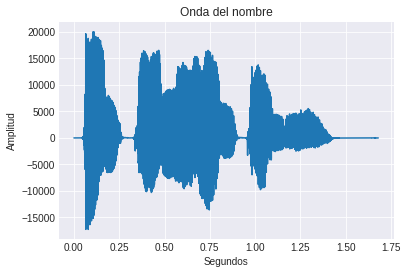

In [5]:
fs1, datos1 = read('name.wav')
fs2, datos2 = read('surname.wav')

# Para poner los segundos en la gráfica
Time1 = np.linspace(0, len(datos1) / fs1, num=len(datos1))
Time2 = np.linspace(0, len(datos2) / fs2, num=len(datos2))

plt.title("Onda del nombre")
plt.xlabel('Segundos')
plt.ylabel('Amplitud')
plt.plot(Time1, datos1)
plt.show()

In [6]:
write(data=datos1, filename='nameProc.wav', rate=fs1)
Audio(datos1, rate=fs1)

In [7]:
wavFile = WAVFile('name.wav')
wavFile.read()

Riff: b'RIFF', Chunk Size: 80676, format: b'WAVE'
Format: 1, Channels 1, Sample Rate: 24000, Kbps: 375
chunk id: b'data', size: 80640
Found data


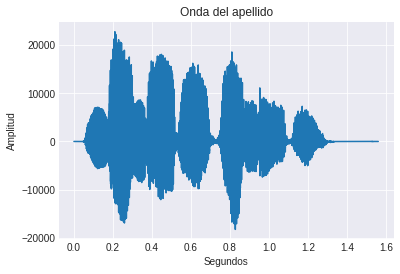

[ 0 -1  0 ...  0  0  0]


In [8]:
plt.title("Onda del apellido")
plt.xlabel('Segundos')
plt.ylabel('Amplitud')
plt.plot(Time2, datos2)
plt.show()
print(datos2)

In [9]:
write(data=datos2, filename='surnameProc.wav', rate=fs2)
Audio(datos2, rate=fs2)

In [10]:
wavFile = WAVFile('surname.wav')
wavFile.read()

Riff: b'RIFF', Chunk Size: 74916, format: b'WAVE'
Format: 1, Channels 1, Sample Rate: 24000, Kbps: 375
chunk id: b'data', size: 74880
Found data


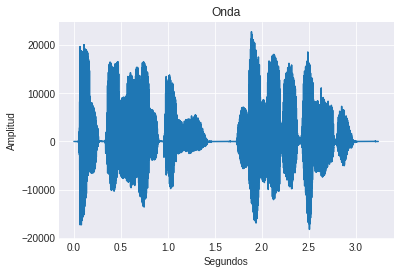

77760
77760


In [11]:
sound1 = AudioSegment.from_wav("name.wav")
sound2 = AudioSegment.from_wav("surname.wav")

combined_sounds = sound1 + sound2
combined_sounds.export("join.wav", format="wav")

fs_j, datos_join = read('join.wav')
Time3 = np.linspace(0, len(datos_join) / fs_j, num=len(datos_join))


plt.title("Onda")
plt.xlabel('Segundos')
plt.ylabel('Amplitud')
plt.plot(Time3, datos_join)
plt.show()

print((datos1.shape[0]+datos2.shape[0]))
print(datos_join.shape[0])

24000
24000
24000


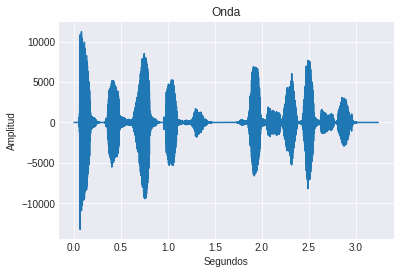

In [12]:
# https://stackoverflow.com/a/12233959

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y
print(fs1)
print(fs2)
print(fs_j)
datos_smooth = butter_bandpass_filter(datos_join, 1000, 2000, fs_j, order=6)

plt.title("Onda")
plt.xlabel('Segundos')
plt.ylabel('Amplitud')
plt.plot(Time3, datos_smooth)
plt.show()

In [13]:
Audio(datos_join, rate=fs_j)

In [14]:
write('mezcla.wav', fs_j, datos_smooth)

In [15]:
Audio(datos_smooth, rate=fs_j)

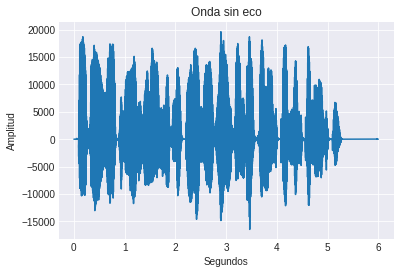

In [16]:
mytext3 = 'PDIH es una asignatura muy guay donde hacemos cosas como esta'

myobj3 = gTTS(text=mytext3, lang=language, slow=False, tld='es')
  
myobj3.save("rev.mp3")
sound = AudioSegment.from_mp3("rev.mp3")
sound.export("rev.wav", format="wav")


fs_r, rev = read('rev.wav')

Time4 = np.linspace(0, len(rev) / fs_r, num=len(rev))


plt.title("Onda sin eco")
plt.xlabel('Segundos')
plt.ylabel('Amplitud')
plt.plot(Time4, rev)
plt.show()

In [17]:
Audio(rev, rate=fs_r)

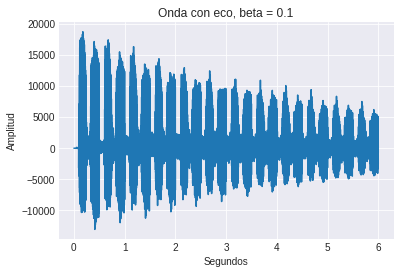

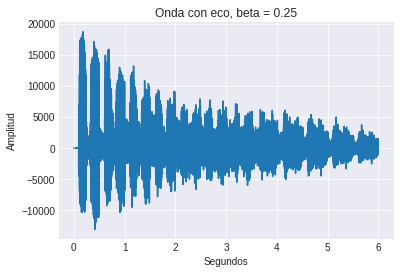

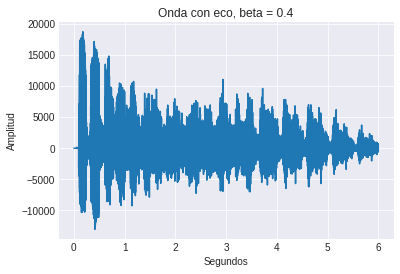

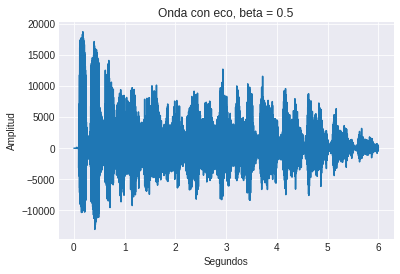

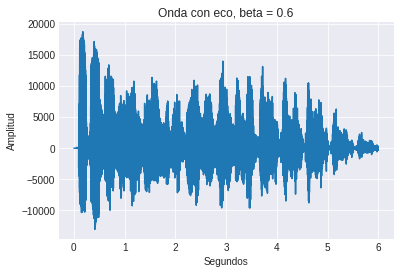

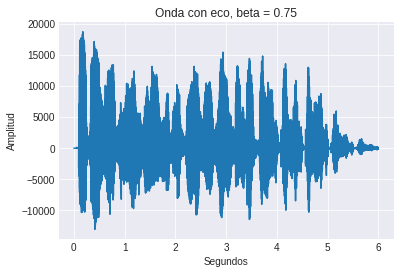

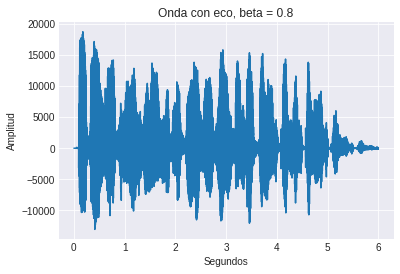

In [18]:
delay_Mil = 0.5
delaySamples = int(fs_r * delay_Mil)

tmp = rev.copy()

beta = 0.7

for beta in [0.1, 0.25, 0.4, 0.5, 0.6, 0.75, 0.8]:
  tmp = rev.copy()
  for i in range (delaySamples, len(rev)):
    tmp[i] = beta*tmp[i] + (1-beta)*tmp[i-delaySamples]

  plt.title(str("Onda con eco, beta = " + str(beta)))
  plt.xlabel('Segundos')
  plt.ylabel('Amplitud')
  plt.plot(Time4, tmp)
  plt.show()

In [19]:
Audio(tmp, rate=fs_r)

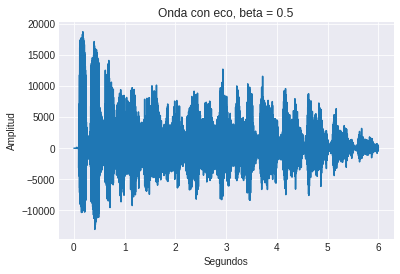

In [20]:
tmp = rev.copy()
beta = 0.5
for i in range (delaySamples, len(rev)):
  tmp[i] = beta*tmp[i] + (1-beta)*tmp[i-delaySamples]
plt.title(str("Onda con eco, beta = " + str(beta)))
plt.xlabel('Segundos')
plt.ylabel('Amplitud')
plt.plot(Time4, tmp)
plt.show()
Audio(tmp, rate=fs_r)

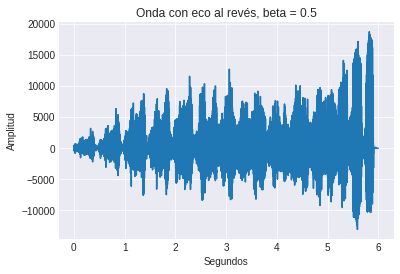

In [22]:
reverse = np.flip(tmp)
plt.title(str("Onda con eco al revés, beta = " + str(beta)))
plt.xlabel('Segundos')
plt.ylabel('Amplitud')
plt.plot(Time4, reverse)
plt.show()
write('alreves.wav', fs_r, reverse)
Audio(reverse, rate=fs_r)